## 預測金融客戶流失

In [1]:
import pandas as pd
dataset = pd.read_csv('https://raw.githubusercontent.com/ywchiu/ctbcpy/master/data/Churn_Modelling.csv')

In [8]:
X = dataset[['CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary']]
y = dataset['Exited'].values

In [9]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [10]:
X['Gender'] = X['Gender'].map(lambda e: 0 if e =='Female' else 1)

/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [11]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,0,42,2,0.00,1,1,1,101348.88
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58
2,502,France,0,42,8,159660.80,3,1,0,113931.57
3,699,France,0,39,1,0.00,2,0,0,93826.63
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10


In [12]:
pd.get_dummies(X['Geography']).head()

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1


In [13]:
X = pd.concat([X, pd.get_dummies(X['Geography'])], axis = 1)

In [15]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain
0,619,France,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,France,0,39,1,0.00,2,0,0,93826.63,1,0,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0,0,1


In [16]:
del X['France']
del X['Geography']

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

In [19]:
X_test = sc.transform(X_test)

In [25]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [26]:
classifier = Sequential()
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [27]:
#classifier.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
8000/8000 [==============================] - 1s 151us/step - loss: 0.4805 - acc: 0.7956
Epoch 2/100
8000/8000 [==============================] - 1s 123us/step - loss: 0.4266 - acc: 0.7960
Epoch 3/100
8000/8000 [==============================] - 1s 132us/step - loss: 0.4204 - acc: 0.8017
Epoch 4/100
8000/8000 [==============================] - 1s 125us/step - loss: 0.4173 - acc: 0.8244
Epoch 5/100
8000/8000 [==============================] - 1s 121us/step - loss: 0.4155 - acc: 0.8294
Epoch 6/100
8000/8000 [==============================] - 1s 125us/step - loss: 0.4139 - acc: 0.8302
Epoch 7/100
8000/8000 [==============================] - 1s 123us/step - loss: 0.4125 - acc: 0.8315
Epoch 8/100
8000/8000 [==============================] - 1s 121us/step - loss: 0.4113 - acc: 0.8321
Epoch 9/100
8000/8000 [==============================] - 1s 120us/step - loss: 0.4108 - acc: 0.8332
Epoch 10/100
8000/8000 [==============================] - 1s 121us/step - loss: 0.4095 - acc: 0.8330

8000/8000 [==============================] - 1s 116us/step - loss: 0.3728 - acc: 0.8395
Epoch 81/100
8000/8000 [==============================] - 1s 115us/step - loss: 0.3722 - acc: 0.8385
Epoch 82/100
8000/8000 [==============================] - 1s 115us/step - loss: 0.3721 - acc: 0.8389
Epoch 83/100
8000/8000 [==============================] - 1s 115us/step - loss: 0.3725 - acc: 0.8410
Epoch 84/100
8000/8000 [==============================] - 1s 115us/step - loss: 0.3716 - acc: 0.8416
Epoch 85/100
8000/8000 [==============================] - 1s 115us/step - loss: 0.3719 - acc: 0.8400
Epoch 86/100
8000/8000 [==============================] - 1s 116us/step - loss: 0.3716 - acc: 0.8400
Epoch 87/100
8000/8000 [==============================] - 1s 119us/step - loss: 0.3719 - acc: 0.8407
Epoch 88/100
8000/8000 [==============================] - 1s 115us/step - loss: 0.3715 - acc: 0.8400
Epoch 89/100
8000/8000 [==============================] - 1s 117us/step - loss: 0.3705 - acc: 0.8405 0s 

In [28]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

In [29]:
def buildClassifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])

    return classifier

In [31]:
classifier = KerasClassifier(build_fn = buildClassifier, batch_size = 10, epochs = 20, optimizer = 'adam')
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
mean = accuracies.mean()
variance = accuracies.std()

Epoch 1/20
6400/6400 [==============================] - 1s 159us/step - loss: 0.4892 - acc: 0.7967
Epoch 2/20
6400/6400 [==============================] - 1s 121us/step - loss: 0.4306 - acc: 0.7980
Epoch 3/20
6400/6400 [==============================] - 1s 121us/step - loss: 0.4270 - acc: 0.7980
Epoch 4/20
6400/6400 [==============================] - 1s 128us/step - loss: 0.4219 - acc: 0.7995
Epoch 5/20
6400/6400 [==============================] - 1s 125us/step - loss: 0.4178 - acc: 0.8191
Epoch 6/20
6400/6400 [==============================] - 1s 121us/step - loss: 0.4157 - acc: 0.8245
Epoch 7/20
6400/6400 [==============================] - 1s 136us/step - loss: 0.4139 - acc: 0.8281
Epoch 8/20
6400/6400 [==============================] - 1s 122us/step - loss: 0.4132 - acc: 0.8291
Epoch 9/20
6400/6400 [==============================] - 1s 127us/step - loss: 0.4118 - acc: 0.8292
Epoch 10/20
6400/6400 [==============================] - 1s 126us/step - loss: 0.4105 - acc: 0.8317
Epoch 11/

1600/1600 [==============================] - 0s 118us/step
Epoch 1/20
6400/6400 [==============================] - 1s 176us/step - loss: 0.5221 - acc: 0.7952
Epoch 2/20
6400/6400 [==============================] - 1s 118us/step - loss: 0.4301 - acc: 0.7958
Epoch 3/20
6400/6400 [==============================] - 1s 119us/step - loss: 0.4266 - acc: 0.7958
Epoch 4/20
6400/6400 [==============================] - 1s 118us/step - loss: 0.4224 - acc: 0.8020
Epoch 5/20
6400/6400 [==============================] - 1s 124us/step - loss: 0.4168 - acc: 0.8272
Epoch 6/20
6400/6400 [==============================] - 1s 127us/step - loss: 0.4123 - acc: 0.8325 0s - loss: 0.4206 - a
Epoch 7/20
6400/6400 [==============================] - 1s 119us/step - loss: 0.4089 - acc: 0.8323
Epoch 8/20
6400/6400 [==============================] - 1s 134us/step - loss: 0.4061 - acc: 0.8353
Epoch 9/20
6400/6400 [==============================] - 1s 127us/step - loss: 0.4041 - acc: 0.8355
Epoch 10/20
6400/6400 [=====

In [32]:
accuracies

array([0.836875  , 0.83125   , 0.84374999, 0.831875  , 0.82874999])

In [33]:
accuracies.mean()

0.834499995112419

In [34]:
accuracies.std()

0.005323884538934815

## Dropout

In [37]:
from keras.layers import Dropout

def buildClassifierWithDropout(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
    classifier.add(Dropout(rate=0.1))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dropout(rate=0.1))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])

    return classifier

In [38]:
classifier = KerasClassifier(build_fn = buildClassifierWithDropout, batch_size = 10, epochs = 20, optimizer = 'adam')
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
mean = accuracies.mean()
variance = accuracies.std()

Epoch 1/20
6400/6400 [==============================] - 1s 204us/step - loss: 0.5001 - acc: 0.7975
Epoch 2/20
6400/6400 [==============================] - 1s 142us/step - loss: 0.4381 - acc: 0.7980
Epoch 3/20
6400/6400 [==============================] - 1s 143us/step - loss: 0.4313 - acc: 0.7980
Epoch 4/20
6400/6400 [==============================] - 1s 149us/step - loss: 0.4268 - acc: 0.7980
Epoch 5/20
6400/6400 [==============================] - 1s 142us/step - loss: 0.4256 - acc: 0.7980
Epoch 6/20
6400/6400 [==============================] - 1s 143us/step - loss: 0.4250 - acc: 0.8111
Epoch 7/20
6400/6400 [==============================] - 1s 139us/step - loss: 0.4260 - acc: 0.8227
Epoch 8/20
6400/6400 [==============================] - 1s 141us/step - loss: 0.4272 - acc: 0.8259
Epoch 9/20
6400/6400 [==============================] - 1s 142us/step - loss: 0.4236 - acc: 0.8292
Epoch 10/20
6400/6400 [==============================] - 1s 147us/step - loss: 0.4253 - acc: 0.8264
Epoch 11/

1600/1600 [==============================] - 0s 159us/step
Epoch 1/20
6400/6400 [==============================] - 2s 235us/step - loss: 0.5056 - acc: 0.7952
Epoch 2/20
6400/6400 [==============================] - 1s 156us/step - loss: 0.4367 - acc: 0.7958
Epoch 3/20
6400/6400 [==============================] - 1s 155us/step - loss: 0.4340 - acc: 0.7958
Epoch 4/20
6400/6400 [==============================] - 1s 158us/step - loss: 0.4334 - acc: 0.7958
Epoch 5/20
6400/6400 [==============================] - 1s 158us/step - loss: 0.4314 - acc: 0.7958
Epoch 6/20
6400/6400 [==============================] - 1s 149us/step - loss: 0.4293 - acc: 0.7958
Epoch 7/20
6400/6400 [==============================] - 1s 149us/step - loss: 0.4298 - acc: 0.7958
Epoch 8/20
6400/6400 [==============================] - 1s 155us/step - loss: 0.4296 - acc: 0.7958
Epoch 9/20
6400/6400 [==============================] - 1s 149us/step - loss: 0.4277 - acc: 0.7958
Epoch 10/20
6400/6400 [===========================

In [39]:
accuracies.mean()

0.8299999957159162

In [40]:
accuracies.std()

0.005405436660659265

## Save Model

In [41]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [44]:
classifier = Sequential()
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
classifier.add(Dropout(rate = 0.1))
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dropout(rate = 0.1))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [45]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

classifier.fit(X_train, y_train, batch_size = 10, epochs = 3)

Epoch 1/3
8000/8000 [==============================] - 2s 212us/step - loss: 0.5173 - acc: 0.7957
Epoch 2/3
8000/8000 [==============================] - 1s 141us/step - loss: 0.4521 - acc: 0.7960
Epoch 3/3
8000/8000 [==============================] - 1s 143us/step - loss: 0.4466 - acc: 0.7960


In [46]:
?classifier.save

In [47]:
classifier.save('model.h5')

In [48]:
c2 = keras.models.load_model('model.h5')

In [49]:
c2.fit(X_train, y_train, batch_size = 10, epochs = 3)

Epoch 1/3
8000/8000 [==============================] - 1s 168us/step - loss: 0.4429 - acc: 0.7961
Epoch 2/3
8000/8000 [==============================] - 1s 144us/step - loss: 0.4385 - acc: 0.8147
Epoch 3/3
8000/8000 [==============================] - 1s 143us/step - loss: 0.4360 - acc: 0.8224


In [61]:
c2.layers[0].get_weights()[0].shape

(11, 6)

In [71]:
c2.layers[0].get_weights()[0]

array([[-4.06448133e-02,  5.55084050e-02,  4.29384559e-02,
         5.20274155e-02,  9.38377995e-03,  4.55283038e-02],
       [ 2.34679729e-01,  5.80971278e-02,  8.55651051e-02,
         1.99418887e-01,  9.13697183e-02,  1.41933709e-01],
       [-5.22249877e-01, -6.69357598e-01, -6.48197293e-01,
         4.26697582e-02, -6.34075284e-01, -6.21043921e-01],
       [ 1.33967713e-01,  1.90516934e-04,  3.31364274e-02,
         5.48120216e-02, -9.18995775e-03, -3.21471132e-02],
       [-1.59449324e-01, -1.88165735e-02, -3.99770029e-03,
        -1.36327729e-01, -1.82831232e-02, -1.45986572e-01],
       [ 4.64144014e-02,  1.51165519e-02, -1.13171712e-02,
         7.85137266e-02,  2.18408443e-02,  3.22272442e-02],
       [ 8.60414505e-02, -1.24756983e-02, -2.77590435e-02,
         2.13420466e-02, -6.37827441e-02, -1.66023113e-02],
       [ 1.96923673e-01,  1.86998453e-02,  6.33544754e-03,
         6.71097755e-01, -2.45717317e-02,  4.05498780e-02],
       [ 1.84402689e-02,  3.09970602e-02,  9.802

In [62]:
c2.layers[0].get_weights()[1].shape

(6,)

In [68]:
c2.layers[2].get_weights()[0].shape

(6, 6)

In [69]:
c2.layers[2].get_weights()[1].shape

(6,)

In [70]:
c2.layers[4].get_weights()[0].shape

(6, 1)

## Keep Saving Model

In [74]:
from keras.callbacks import ModelCheckpoint

classifier = Sequential()
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
classifier.add(Dropout(rate = 0.1))
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dropout(rate = 0.1))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [75]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

checkpointer = ModelCheckpoint(filepath="model2.h5",
                               verbose=1,
                               save_best_only=True)

classifier.fit(X_train, y_train, batch_size = 10, epochs = 3,
                    callbacks=[checkpointer])

Epoch 1/3
8000/8000 [==============================] - 2s 238us/step - loss: 0.4917 - acc: 0.7951
Epoch 2/3
 970/8000 [==>...........................] - ETA: 1s - loss: 0.4531 - acc: 0.7866

/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/keras/callbacks.py:403: RuntimeWarning: Can save best model only with val_loss available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


8000/8000 [==============================] - 1s 153us/step - loss: 0.4359 - acc: 0.7960
Epoch 3/3
8000/8000 [==============================] - 1s 151us/step - loss: 0.4353 - acc: 0.7960


## Grid Search

In [ ]:
from keras.layers import Dropout

def buildClassifierWithDropout(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
    classifier.add(Dropout(rate=0.1))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dropout(rate=0.1))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])

    return classifier

In [77]:
from sklearn.model_selection import GridSearchCV
classifier = KerasClassifier(build_fn = buildClassifierWithDropout, epochs = 3)
parameters = {'batch_size': [10, 15],
              'optimizer': ['adam', 'rmsprop']}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5)
grid_search     = grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_params_
best_accuracy   = grid_search.best_score_

Epoch 1/3
6400/6400 [==============================] - 2s 256us/step - loss: 0.5253 - acc: 0.7977
Epoch 2/3
6400/6400 [==============================] - 1s 151us/step - loss: 0.4423 - acc: 0.7980
Epoch 3/3
6400/6400 [==============================] - 1s 151us/step - loss: 0.4351 - acc: 0.7980
Epoch 1/3
6400/6400 [==============================] - 2s 268us/step - loss: 0.5035 - acc: 0.7964
Epoch 2/3
6400/6400 [==============================] - 1s 160us/step - loss: 0.4369 - acc: 0.7972
Epoch 3/3
6400/6400 [==============================] - 1s 151us/step - loss: 0.4355 - acc: 0.7972
Epoch 1/3
6400/6400 [==============================] - 2s 273us/step - loss: 0.5262 - acc: 0.7905
Epoch 2/3
6400/6400 [==============================] - 1s 162us/step - loss: 0.4398 - acc: 0.8058
Epoch 3/3
6400/6400 [==============================] - 1s 154us/step - loss: 0.4364 - acc: 0.8186
Epoch 1/3
6400/6400 [==============================] - 2s 293us/step - loss: 0.5092 - acc: 0.7973
Epoch 2/3
6400/6400 

## Comparing Models

In [78]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [79]:
classifier = Sequential()
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
classifier.add(Dropout(rate = 0.1))
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dropout(rate = 0.1))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [80]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
8000/8000 [==============================] - 3s 345us/step - loss: 0.4799 - acc: 0.7960
Epoch 2/100
8000/8000 [==============================] - 1s 173us/step - loss: 0.4350 - acc: 0.7960
Epoch 3/100
8000/8000 [==============================] - 1s 155us/step - loss: 0.4290 - acc: 0.7960
Epoch 4/100
8000/8000 [==============================] - 1s 159us/step - loss: 0.4247 - acc: 0.8009
Epoch 5/100
8000/8000 [==============================] - 1s 153us/step - loss: 0.4252 - acc: 0.8215
Epoch 6/100
8000/8000 [==============================] - 1s 151us/step - loss: 0.4255 - acc: 0.8256
Epoch 7/100
8000/8000 [==============================] - 1s 154us/step - loss: 0.4253 - acc: 0.8255
Epoch 8/100
8000/8000 [==============================] - 1s 151us/step - loss: 0.4258 - acc: 0.8275
Epoch 9/100
8000/8000 [==============================] - 1s 152us/step - loss: 0.4276 - acc: 0.8265
Epoch 10/100
8000/8000 [==============================] - 1s 151us/step - loss: 0.4217 - acc: 0.8285

8000/8000 [==============================] - 1s 150us/step - loss: 0.4192 - acc: 0.8334
Epoch 82/100
8000/8000 [==============================] - 1s 151us/step - loss: 0.4214 - acc: 0.8329
Epoch 83/100
8000/8000 [==============================] - 1s 150us/step - loss: 0.4204 - acc: 0.8332
Epoch 84/100
8000/8000 [==============================] - 1s 151us/step - loss: 0.4186 - acc: 0.8334
Epoch 85/100
8000/8000 [==============================] - 1s 151us/step - loss: 0.4198 - acc: 0.8352
Epoch 86/100
8000/8000 [==============================] - 1s 150us/step - loss: 0.4158 - acc: 0.8329
Epoch 87/100
8000/8000 [==============================] - 1s 151us/step - loss: 0.4197 - acc: 0.8332
Epoch 88/100
8000/8000 [==============================] - 1s 151us/step - loss: 0.4204 - acc: 0.8342
Epoch 89/100
8000/8000 [==============================] - 1s 154us/step - loss: 0.4208 - acc: 0.8320
Epoch 90/100
8000/8000 [==============================] - 1s 152us/step - loss: 0.4201 - acc: 0.8345
Epo

In [81]:
y_pred = classifier.predict(X_test)

In [84]:
y_pred > 0.5

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [85]:
(y_pred > 0.5).astype(int)

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [86]:
y_test

array([0, 1, 0, ..., 0, 0, 0])

In [89]:
predicted = (y_pred > 0.5).flatten().astype(int)
predicted

array([0, 0, 0, ..., 0, 0, 0])

In [93]:
sum(predicted == y_test) / len(y_test)

0.8395

In [95]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test , predicted)

In [96]:
cm

array([[1552,   43],
       [ 278,  127]])

In [97]:
TP = cm[0,0 ]
TP

1552

In [99]:
FN = cm[0,1 ]
FN

43

In [100]:
FP = cm[1,0 ]
FP

278

In [101]:
TN = cm[1,1 ]
TN

127

In [102]:
TPR = TP / (TP + FN)

In [103]:
FPR = FP / (FP + TN)

In [104]:
FPR

0.6864197530864198

In [105]:
TPR

0.9730407523510972

In [106]:
from sklearn.metrics import roc_curve
fpr_ary, tpr_ary, thresholds = roc_curve(y_test, y_pred)

In [108]:
#tpr_ary
#fpr_ary

Populating the interactive namespace from numpy and matplotlib


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['cm', 'mean']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


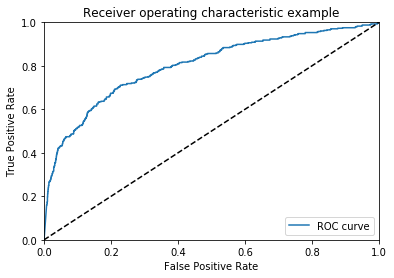

In [109]:
%pylab inline
import matplotlib.pyplot as plt
plt.plot(fpr_ary, tpr_ary, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [110]:
from sklearn.metrics import auc
auc(fpr_ary, tpr_ary)

0.7999055691009713

In [111]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

clf1 = DecisionTreeClassifier()
clf1.fit(X_train, y_train)

clf2 = SVC(probability = True)
clf2.fit(X_train, y_train)

clf3 = LogisticRegression()
clf3.fit(X_train, y_train)

clf4 = RandomForestClassifier()
clf4.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

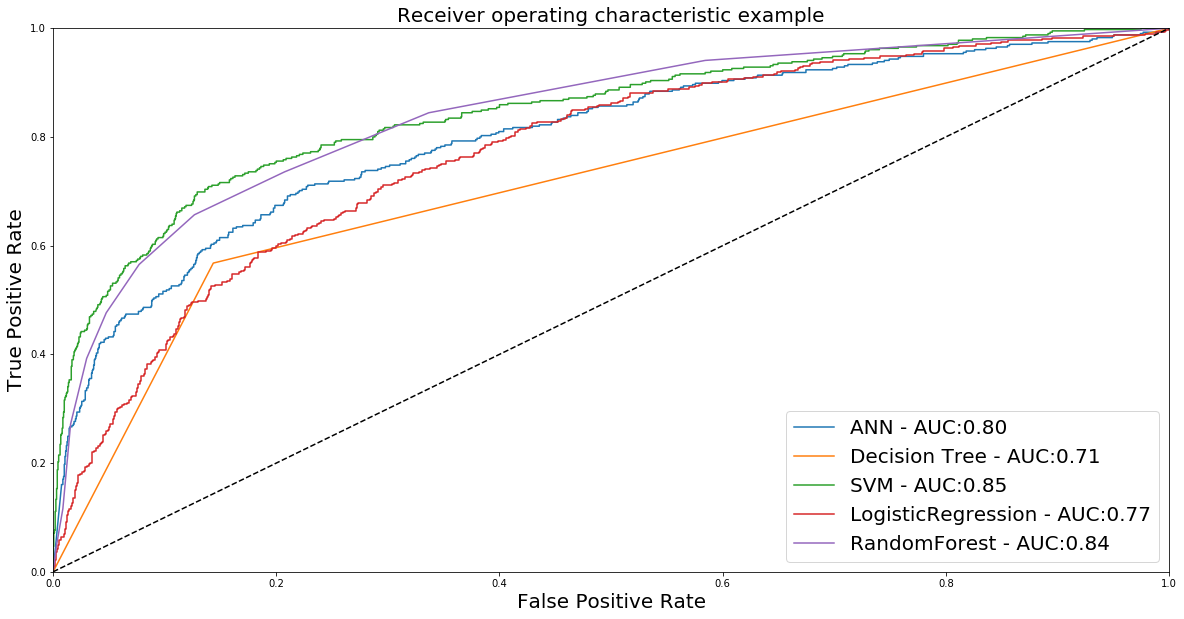

In [115]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

plt.figure(figsize= [20,10])

for clf, title in zip([classifier,clf1,clf2,clf3, clf4], ['ANN','Decision Tree', 'SVM', 'LogisticRegression', 'RandomForest']):
    if title != 'ANN':
        probas_ = clf.fit(X_train, y_train).predict_proba(X_test)
        fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    else:
        y_pred = clf.predict(X_test)
        fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr, label='%s - AUC:%.2f'%(title, auc(fpr, tpr)) )
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize = 20)
plt.ylabel('True Positive Rate', fontsize = 20)
plt.title('Receiver operating characteristic example', fontsize = 20)
plt.legend(loc="lower right", fontsize = 20)
plt.show()

In [112]:
a = [1,2,3]
b = [2,3,4]
list(zip(a,b))

[(1, 2), (2, 3), (3, 4)]